In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
df = pd.read_excel('C://Users//eorsswv//Reporting//Data//Google1.xls')
df.tail(2)

,date,open,high,low,close,volume,Name
1257,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL
1258,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL


In [50]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599]])

In [51]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263]])

In [53]:


dataset_test = scaler.transform(dataset_test)
dataset_test[:5]



array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213]])

In [54]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [55]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [56]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [57]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [59]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
957/957 [==============================] - 5s 5ms/step - loss: 0.0357
Epoch 2/50
957/957 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 3/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0060
Epoch 4/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 5/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0062
Epoch 6/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0052
Epoch 7/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 8/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 9/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 10/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 11/50
957/957 [==============================] - 4s 4ms/step - loss: 0.0041
Epoch 12/50
957/957 [==============================] - 4s 5ms/step - loss: 0.0042
Epoch 13/50
957/957 [====

In [61]:
model = load_model('stock_prediction.h5')

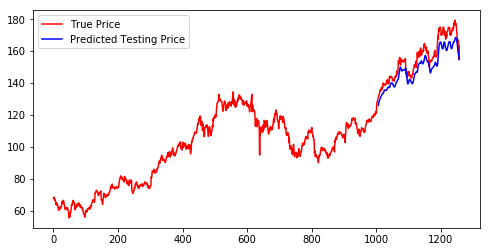

In [62]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

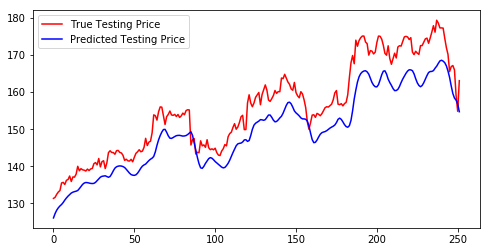

In [63]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [64]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[154.71327, 257.35556, 287.79675, 292.6682, 294.42947, 294.73337, 294.84177, 294.86908, 294.89185, 294.91333, 294.93503, 294.9552, 294.9732, 294.98862, 295.00168, 295.0125, 295.02142, 295.0288, 295.03476, 295.03973, 295.04385, 295.04733, 295.05023, 295.0527, 295.0548, 295.05673, 295.0584, 295.06, 295.06152, 295.06287, 295.0642, 295.06555, 295.06683, 295.0681, 295.0691, 295.06964, 295.0696, 295.06857, 295.06665, 295.06403, 295.06168, 295.06097, 295.06363, 295.07062, 295.0808, 295.0889, 295.08566, 295.05566, 294.98236, 294.86087, 294.68945, 294.6676, 294.6666, 294.6664, 294.6664, 294.66638, 294.6664, 294.66644, 294.66647, 294.66647, 294.66647, 294.6665, 294.6665, 294.66656, 294.66663, 294.6666, 294.66663, 294.66663, 294.66663, 294.66666, 294.66666, 294.66666, 294.66672, 294.6667, 294.66672, 294.66672, 294.66672, 294.66675, 294.66678, 294.66678, 294.6668, 294.6668, 294.6668, 294.6668, 294.66684, 294.66684, 294.66687, 294.66687, 294.6669, 294.66687, 294.66693, 294.66693, 294.66693, 294.666